# Compare the performance of an RNN, an LSTM, a GRU and a Transformer for classifying sequential MNIST digits

In [1]:
# Python ≥ 3.8 is required
import sys
assert sys.version_info >= (3,8)
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import pandas as pd

# Scikit-Learn ≥ 0.23 is required
import sklearn
assert sklearn.__version__ >= "0.23"

# TensorFlow ≥ 2.4 and Keras ≥ 2.4 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.4"
assert keras.__version__ >= "2.4"

print("The version of your Tensorflow is "+ tf.__version__)
print("The version of your Keras is "+ keras.__version__)

The version of your Tensorflow is 2.4.1
The version of your Keras is 2.4.0


In [2]:
# Enable memory growth

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [3]:
# Number of GPU used

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices("GPU")))

Num GPUs Available:  1


In [4]:
# Loading and scaling the MNIST dataset

mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

sample, sample_label = X_train[0], y_train[0]

# Building Simple RNN, LSTM and GRU model

In [5]:
def build_recurrent_model(recurrent_type ='SimpleRNN', n_recurrent_units = 1, n_recurrent_layers = 1):
    
    np.random.seed(5)
    tf.random.set_seed(5)

    # build the model
    model = tf.keras.Sequential()
    
    for i in range(n_recurrent_layers):
        return_sequences = (i < n_recurrent_layers-1)
        if recurrent_type == 'SimpleRNN':
            recurrent_layer = keras.layers.SimpleRNN(
                units=n_recurrent_units,
                return_sequences=return_sequences,
                input_shape = X_train.shape[1:])
        elif recurrent_type == 'LSTM':
            recurrent_layer = keras.layers.LSTM(
                units=n_recurrent_units,
                return_sequences=return_sequences,
                input_shape = X_train.shape[1:])
        elif recurrent_type == 'GRU':
            recurrent_layer = keras.layers.GRU(
                units=n_recurrent_units,
                return_sequences=return_sequences,
                input_shape = X_train.shape[1:])
            
        model.add(recurrent_layer)

    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return model

### Experience #1: Implementing a single layer with 10 neuron

In [6]:
RNN_Model = build_recurrent_model(recurrent_type ='SimpleRNN', n_recurrent_units = 10, n_recurrent_layers = 1)
LSTM_Model = build_recurrent_model(recurrent_type ='LSTM', n_recurrent_units = 10, n_recurrent_layers = 1)
GRU_Model = build_recurrent_model(recurrent_type ='GRU', n_recurrent_units = 10, n_recurrent_layers = 1)

In [7]:
print(RNN_Model.summary())
print()
print(LSTM_Model.summary())
print()
print(GRU_Model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                390       
_________________________________________________________________
dense (Dense)                (None, 10)                110       
Total params: 500
Trainable params: 500
Non-trainable params: 0
_________________________________________________________________
None

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 1,670
Trainable params: 1,670
Non-trainable params: 0
_________________________________________________________________
None

Model: "sequential_2"


---

In [8]:
# Training Simple RNN on 20 epochs

start = time.time()
optimizer = keras.optimizers.Adam(lr=0.001)
RNN_Model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
RNN_history = RNN_Model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size = 128)
end = time.time()
print("Temps total d'execution = "+str(end-start) +" "+ "s")

Epoch 1/20
430/430 [==============================] - 22s 48ms/step - loss: 2.1014 - accuracy: 0.2147 - val_loss: 1.5499 - val_accuracy: 0.4558
Epoch 2/20
430/430 [==============================] - 19s 43ms/step - loss: 1.4965 - accuracy: 0.4548 - val_loss: 1.3108 - val_accuracy: 0.5254
Epoch 3/20
430/430 [==============================] - 17s 40ms/step - loss: 1.3037 - accuracy: 0.5217 - val_loss: 1.1554 - val_accuracy: 0.5984
Epoch 4/20
430/430 [==============================] - 17s 40ms/step - loss: 1.1688 - accuracy: 0.5847 - val_loss: 1.0529 - val_accuracy: 0.6340
Epoch 5/20
430/430 [==============================] - 19s 45ms/step - loss: 1.0713 - accuracy: 0.6220 - val_loss: 0.9951 - val_accuracy: 0.6584
Epoch 6/20
430/430 [==============================] - 18s 41ms/step - loss: 1.0213 - accuracy: 0.6414 - val_loss: 0.9728 - val_accuracy: 0.6622
Epoch 7/20
430/430 [==============================] - 19s 43ms/step - loss: 0.9827 - accuracy: 0.6577 - val_loss: 0.9326 - val_accuracy:

In [9]:
# Plotting Results

def plot_learning_curves(train, val, y_label ="Loss", Title="Losses",
                         train_label = "Simple RNN Train loss", val_label = "Simple RNN Validation loss"):
    
    plt.plot(np.arange(len(train)), train, "b.-", label=train_label)
    plt.plot(np.arange(len(val)), val, "r.-", label=val_label)
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel(y_label)
    plt.title(Title)
    plt.grid(True)

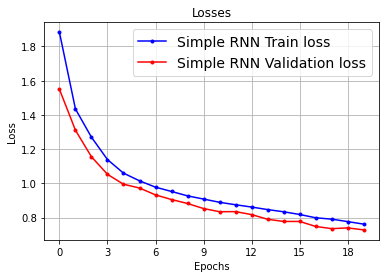

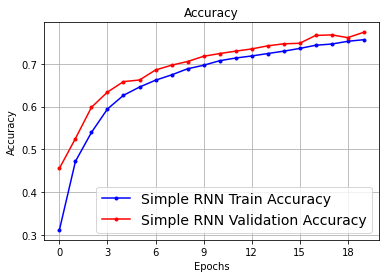

In [10]:
plot_learning_curves(RNN_history.history["loss"], RNN_history.history["val_loss"])
plt.show()
plot_learning_curves(RNN_history.history["accuracy"], RNN_history.history["val_accuracy"], y_label ="Accuracy", Title="Accuracy",
                         train_label = "Simple RNN Train Accuracy", val_label = "Simple RNN Validation Accuracy")

In [11]:
# Simple RNN Evaluation

rnn_evaluation = RNN_Model.evaluate(X_test, y_test)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (rnn_evaluation[0], rnn_evaluation[1]))

313/313 [==============================] - 2s 8ms/step - loss: 0.7369 - accuracy: 0.7702
Summary: Loss over the test dataset: 0.74, Accuracy: 0.77


Predicted result is: [3], target result is: 7


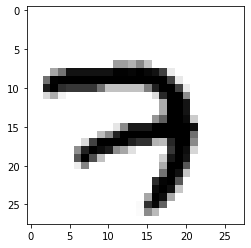

In [12]:
with tf.device("GPU:0"):
    RNN_Model.set_weights(RNN_Model.get_weights())
    result = tf.argmax(RNN_Model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
    print(
        "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
    )
    plt.imshow(sample, cmap="binary")

---

In [13]:
# Training LSTM on 20 epochs

start = time.time()
LSTM_Model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
LSTM_history = LSTM_Model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size = 128)
end = time.time()
print("Temps total d'execution = "+str(end-start) +" "+ "s")

Epoch 1/20
430/430 [==============================] - 7s 10ms/step - loss: 1.6057 - accuracy: 0.4358 - val_loss: 0.7622 - val_accuracy: 0.7546
Epoch 2/20
430/430 [==============================] - 4s 9ms/step - loss: 0.7376 - accuracy: 0.7621 - val_loss: 0.5516 - val_accuracy: 0.8286
Epoch 3/20
430/430 [==============================] - 4s 9ms/step - loss: 0.5720 - accuracy: 0.8172 - val_loss: 0.4548 - val_accuracy: 0.8612
Epoch 4/20
430/430 [==============================] - 4s 9ms/step - loss: 0.4820 - accuracy: 0.8495 - val_loss: 0.3947 - val_accuracy: 0.8808
Epoch 5/20
430/430 [==============================] - 4s 9ms/step - loss: 0.4225 - accuracy: 0.8688 - val_loss: 0.3544 - val_accuracy: 0.8914
Epoch 6/20
430/430 [==============================] - 4s 9ms/step - loss: 0.3849 - accuracy: 0.8827 - val_loss: 0.3291 - val_accuracy: 0.8970
Epoch 7/20
430/430 [==============================] - 4s 10ms/step - loss: 0.3525 - accuracy: 0.8928 - val_loss: 0.3030 - val_accuracy: 0.9126
Epoc

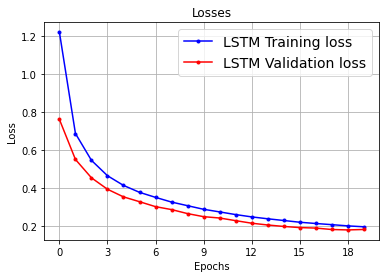

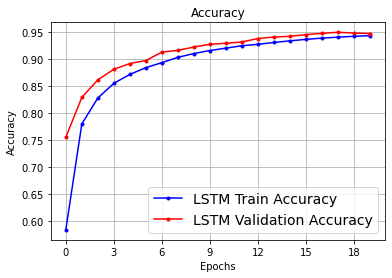

In [14]:
# Plotting Training loss vs Validation loss

plot_learning_curves(LSTM_history.history["loss"], LSTM_history.history["val_loss"], train_label = "LSTM Training loss", 
                     val_label = "LSTM Validation loss")
plt.show()
plot_learning_curves(LSTM_history.history["accuracy"], LSTM_history.history["val_accuracy"], y_label ="Accuracy", Title="Accuracy",
                         train_label = "LSTM Train Accuracy", val_label = "LSTM Validation Accuracy")

In [15]:
# LSTM Evaluation

lstm_evaluation = LSTM_Model.evaluate(X_test, y_test)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (lstm_evaluation[0], lstm_evaluation[1]))

313/313 [==============================] - 1s 5ms/step - loss: 0.2038 - accuracy: 0.9396
Summary: Loss over the test dataset: 0.20, Accuracy: 0.94


Predicted result is: [7], target result is: 7


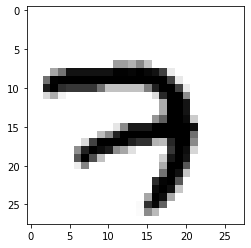

In [16]:
with tf.device("GPU:0"):
    
    LSTM_Model.set_weights(LSTM_Model.get_weights())
    result = tf.argmax(LSTM_Model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
    print(
        "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
    )
    plt.imshow(sample, cmap="binary")

---

In [17]:
# Training GRU on 20 epochs

start = time.time()
GRU_Model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
GRU_history = GRU_Model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size = 128)
end = time.time()
print("Temps total d'execution = "+str(end-start) +" "+ "s")

Epoch 1/20
430/430 [==============================] - 6s 10ms/step - loss: 1.7080 - accuracy: 0.3691 - val_loss: 1.0578 - val_accuracy: 0.6292
Epoch 2/20
430/430 [==============================] - 4s 9ms/step - loss: 1.0133 - accuracy: 0.6534 - val_loss: 0.8299 - val_accuracy: 0.7338
Epoch 3/20
430/430 [==============================] - 4s 9ms/step - loss: 0.8163 - accuracy: 0.7309 - val_loss: 0.7088 - val_accuracy: 0.7764
Epoch 4/20
430/430 [==============================] - 4s 9ms/step - loss: 0.7074 - accuracy: 0.7683 - val_loss: 0.6378 - val_accuracy: 0.7908
Epoch 5/20
430/430 [==============================] - 4s 9ms/step - loss: 0.6271 - accuracy: 0.7941 - val_loss: 0.5661 - val_accuracy: 0.8198
Epoch 6/20
430/430 [==============================] - 4s 9ms/step - loss: 0.5700 - accuracy: 0.8159 - val_loss: 0.5265 - val_accuracy: 0.8342
Epoch 7/20
430/430 [==============================] - 4s 9ms/step - loss: 0.5326 - accuracy: 0.8306 - val_loss: 0.4874 - val_accuracy: 0.8472
Epoch

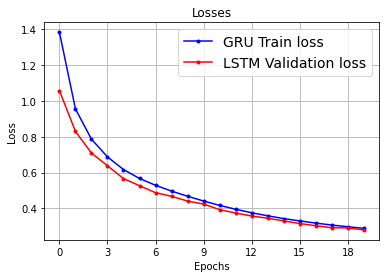

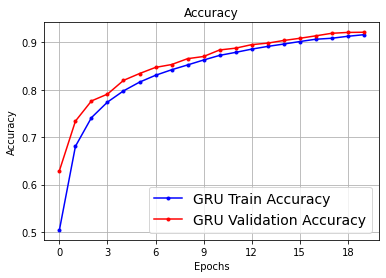

In [18]:
# Plotting Training loss vs Validation loss

plot_learning_curves(GRU_history.history["loss"], GRU_history.history["val_loss"], train_label = "GRU Train loss", 
                     val_label = "LSTM Validation loss")
plt.show()
plot_learning_curves(GRU_history.history["accuracy"], GRU_history.history["val_accuracy"], y_label ="Accuracy", Title="Accuracy",
                         train_label = "GRU Train Accuracy", val_label = "GRU Validation Accuracy")

In [19]:
# GRU Evaluation

gru_evaluation = GRU_Model.evaluate(X_test, y_test)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (gru_evaluation[0], gru_evaluation[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.2786 - accuracy: 0.9167
Summary: Loss over the test dataset: 0.28, Accuracy: 0.92


Predicted result is: [7], target result is: 7


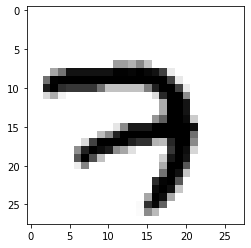

In [20]:
with tf.device("GPU:0"):
    
    GRU_Model.set_weights(GRU_Model.get_weights())
    result = tf.argmax(GRU_Model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
    print(
        "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
    )
    plt.imshow(sample, cmap="binary")

#### Recap: Sur cette 1re experience, nous notons une meilleure performance sur les donnees de test pour les modeles LSTM et GRU (94% et 92% d'accuracy respectivement) comparativement a celle avec Simple RNN (77% d'accuracy)

### Experience #2: Implementing a single layer with 20 neurons

In [21]:
RNN_Model = build_recurrent_model(recurrent_type ='SimpleRNN', n_recurrent_units = 20, n_recurrent_layers = 1)
LSTM_Model = build_recurrent_model(recurrent_type ='LSTM', n_recurrent_units = 20, n_recurrent_layers = 1)
GRU_Model = build_recurrent_model(recurrent_type ='GRU', n_recurrent_units = 20, n_recurrent_layers = 1)

In [22]:
print(RNN_Model.summary())
print()
print(LSTM_Model.summary())
print()
print(GRU_Model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 20)                980       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 1,190
Trainable params: 1,190
Non-trainable params: 0
_________________________________________________________________
None

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                3920      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
Total params: 4,130
Trainable params: 4,130
Non-trainable params: 0
_________________________________________________________________
None

Model: "sequenti

---

In [23]:
# Training Simple RNN on 20 epochs

start = time.time()
RNN_Model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
RNN_history = RNN_Model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size = 128)
end = time.time()
print("Temps total d'execution = "+str(end-start) +" "+ "s")

Epoch 1/20
430/430 [==============================] - 20s 45ms/step - loss: 1.4943 - accuracy: 0.4857 - val_loss: 0.8693 - val_accuracy: 0.7210
Epoch 2/20
430/430 [==============================] - 19s 45ms/step - loss: 0.8518 - accuracy: 0.7219 - val_loss: 0.7278 - val_accuracy: 0.7688
Epoch 3/20
430/430 [==============================] - 20s 46ms/step - loss: 0.7278 - accuracy: 0.7645 - val_loss: 0.6551 - val_accuracy: 0.7906
Epoch 4/20
430/430 [==============================] - 18s 42ms/step - loss: 0.6706 - accuracy: 0.7803 - val_loss: 0.6198 - val_accuracy: 0.8030
Epoch 5/20
430/430 [==============================] - 24s 56ms/step - loss: 0.6330 - accuracy: 0.7947 - val_loss: 0.6070 - val_accuracy: 0.8030
Epoch 6/20
430/430 [==============================] - 22s 50ms/step - loss: 0.5963 - accuracy: 0.8070 - val_loss: 0.5532 - val_accuracy: 0.8214
Epoch 7/20
430/430 [==============================] - 22s 50ms/step - loss: 0.5702 - accuracy: 0.8136 - val_loss: 0.5396 - val_accuracy:

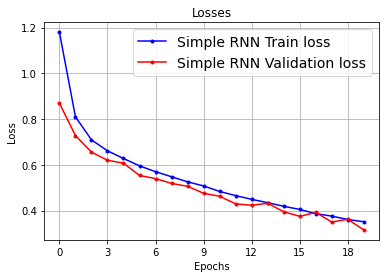

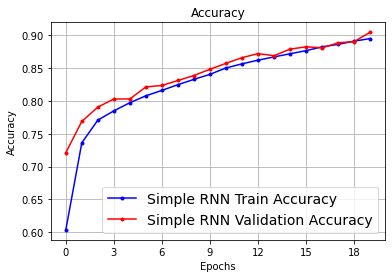

In [24]:
plot_learning_curves(RNN_history.history["loss"], RNN_history.history["val_loss"])
plt.show()
plot_learning_curves(RNN_history.history["accuracy"], RNN_history.history["val_accuracy"], y_label ="Accuracy", Title="Accuracy",
                         train_label = "Simple RNN Train Accuracy", val_label = "Simple RNN Validation Accuracy")

In [25]:
# Simple RNN Evaluation

rnn_evaluation = RNN_Model.evaluate(X_test, y_test)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (rnn_evaluation[0], rnn_evaluation[1]))

313/313 [==============================] - 3s 8ms/step - loss: 0.3201 - accuracy: 0.9023
Summary: Loss over the test dataset: 0.32, Accuracy: 0.90


Predicted result is: [7], target result is: 7


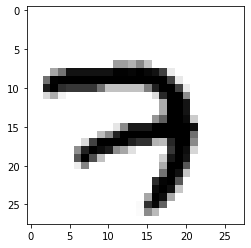

In [26]:
with tf.device("GPU:0"):
    
    RNN_Model.set_weights(RNN_Model.get_weights())
    result = tf.argmax(RNN_Model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
    print(
        "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
    )
    plt.imshow(sample, cmap="binary")

---

In [27]:
# Training LSTM on 20 epochs

start = time.time()
LSTM_Model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
LSTM_history = LSTM_Model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size = 128)
end = time.time()
print("Temps total d'execution = "+str(end-start) +" "+ "s")

Epoch 1/20
430/430 [==============================] - 6s 10ms/step - loss: 1.1564 - accuracy: 0.6078 - val_loss: 0.3550 - val_accuracy: 0.9006
Epoch 2/20
430/430 [==============================] - 4s 9ms/step - loss: 0.3183 - accuracy: 0.9053 - val_loss: 0.2311 - val_accuracy: 0.9336
Epoch 3/20
430/430 [==============================] - 4s 9ms/step - loss: 0.2347 - accuracy: 0.9317 - val_loss: 0.1846 - val_accuracy: 0.9470
Epoch 4/20
430/430 [==============================] - 4s 10ms/step - loss: 0.1967 - accuracy: 0.9431 - val_loss: 0.1653 - val_accuracy: 0.9516
Epoch 5/20
430/430 [==============================] - 4s 9ms/step - loss: 0.1700 - accuracy: 0.9504 - val_loss: 0.1556 - val_accuracy: 0.9556
Epoch 6/20
430/430 [==============================] - 4s 9ms/step - loss: 0.1553 - accuracy: 0.9559 - val_loss: 0.1377 - val_accuracy: 0.9638
Epoch 7/20
430/430 [==============================] - 4s 9ms/step - loss: 0.1440 - accuracy: 0.9573 - val_loss: 0.1360 - val_accuracy: 0.9602
Epoc

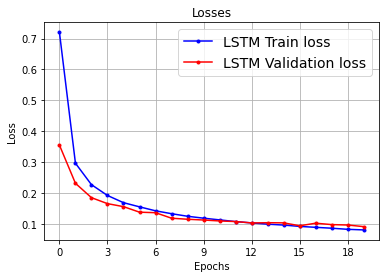

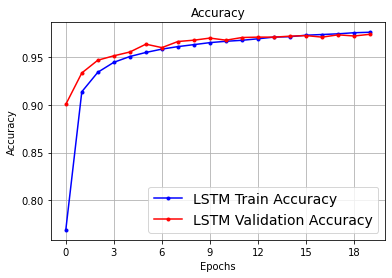

In [28]:
# Plotting Training loss vs Validation loss

plot_learning_curves(LSTM_history.history["loss"], LSTM_history.history["val_loss"], train_label = "LSTM Train loss", 
                     val_label = "LSTM Validation loss")
plt.show()
plot_learning_curves(LSTM_history.history["accuracy"], LSTM_history.history["val_accuracy"], y_label ="Accuracy", Title="Accuracy",
                         train_label = "LSTM Train Accuracy", val_label = "LSTM Validation Accuracy")

In [29]:
# LSTM Evaluation

lstm_evaluation = LSTM_Model.evaluate(X_test, y_test)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (lstm_evaluation[0], lstm_evaluation[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.0852 - accuracy: 0.9742
Summary: Loss over the test dataset: 0.09, Accuracy: 0.97


Predicted result is: [7], target result is: 7


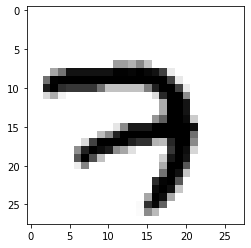

In [31]:
with tf.device("GPU:0"):
    
    LSTM_Model.set_weights(LSTM_Model.get_weights())
    result = tf.argmax(LSTM_Model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
    print(
        "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
    )
    plt.imshow(sample, cmap="binary")

---

In [32]:
# Training GRU on 20 epochs

start = time.time()
GRU_Model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
GRU_history = GRU_Model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size = 128)
end = time.time()
print("Temps total d'execution = "+str(end-start) +" "+ "s")

Epoch 1/20
430/430 [==============================] - 5s 10ms/step - loss: 1.3048 - accuracy: 0.5468 - val_loss: 0.4492 - val_accuracy: 0.8710
Epoch 2/20
430/430 [==============================] - 4s 9ms/step - loss: 0.4137 - accuracy: 0.8780 - val_loss: 0.3144 - val_accuracy: 0.9090
Epoch 3/20
430/430 [==============================] - 4s 9ms/step - loss: 0.3098 - accuracy: 0.9098 - val_loss: 0.2555 - val_accuracy: 0.9286
Epoch 4/20
430/430 [==============================] - 4s 9ms/step - loss: 0.2555 - accuracy: 0.9266 - val_loss: 0.2275 - val_accuracy: 0.9346
Epoch 5/20
430/430 [==============================] - 4s 9ms/step - loss: 0.2240 - accuracy: 0.9364 - val_loss: 0.2027 - val_accuracy: 0.9428
Epoch 6/20
430/430 [==============================] - 4s 9ms/step - loss: 0.2006 - accuracy: 0.9442 - val_loss: 0.1875 - val_accuracy: 0.9464
Epoch 7/20
430/430 [==============================] - 4s 9ms/step - loss: 0.1853 - accuracy: 0.9471 - val_loss: 0.1814 - val_accuracy: 0.9492
Epoch

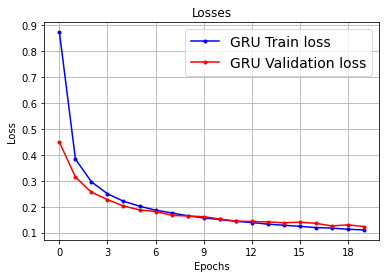

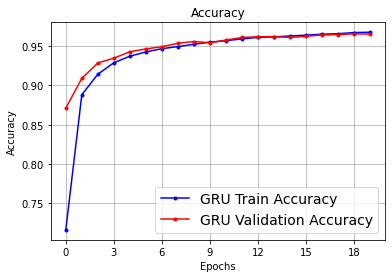

In [33]:
# Plotting Training loss vs Validation loss

plot_learning_curves(GRU_history.history["loss"], GRU_history.history["val_loss"], train_label = "GRU Train loss", 
                     val_label = "GRU Validation loss")
plt.show()
plot_learning_curves(GRU_history.history["accuracy"], GRU_history.history["val_accuracy"], y_label ="Accuracy", Title="Accuracy",
                         train_label = "GRU Train Accuracy", val_label = "GRU Validation Accuracy")

In [34]:
# GRU Evaluation

gru_evaluation = GRU_Model.evaluate(X_test, y_test)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (gru_evaluation[0], gru_evaluation[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.1240 - accuracy: 0.9658
Summary: Loss over the test dataset: 0.12, Accuracy: 0.97


Predicted result is: [7], target result is: 7


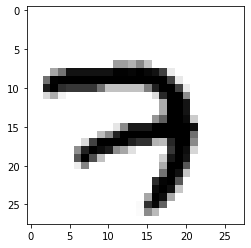

In [36]:
with tf.device("GPU:0"):
    
    GRU_Model.set_weights(GRU_Model.get_weights())
    result = tf.argmax(GRU_Model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
    print(
        "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
    )
    plt.imshow(sample, cmap="binary")

#### Recap: Pour la 2eme experience, nous notons encore la pire performance avec le Simple RNN, 90% d'accuracy. Le LSTM et le GRU enregistrent la meme performance sur les donnees test (97%).

### Experience #3: Implementing 3 recurrent layers with 10 neurons each

In [37]:
RNN_Model = build_recurrent_model(recurrent_type ='SimpleRNN', n_recurrent_units = 10, n_recurrent_layers = 3)
LSTM_Model = build_recurrent_model(recurrent_type ='LSTM', n_recurrent_units = 10, n_recurrent_layers = 3)
GRU_Model = build_recurrent_model(recurrent_type ='GRU', n_recurrent_units = 10, n_recurrent_layers = 3)

In [38]:
print(RNN_Model.summary())
print()
print(LSTM_Model.summary())
print()
print(GRU_Model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 28, 10)            390       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 28, 10)            210       
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 10)                210       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 920
Trainable params: 920
Non-trainable params: 0
_________________________________________________________________
None

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 28, 10)            1560      
____________________________

---

In [39]:
# Training Simple RNN on 20 epochs

start = time.time()
RNN_Model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
RNN_history = RNN_Model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size = 128)
end = time.time()
print("Temps total d'execution = "+str(end-start) +" "+ "s")

Epoch 1/20
430/430 [==============================] - 62s 141ms/step - loss: 1.6033 - accuracy: 0.3956 - val_loss: 1.0018 - val_accuracy: 0.6228
Epoch 2/20
430/430 [==============================] - 55s 128ms/step - loss: 0.9958 - accuracy: 0.6275 - val_loss: 0.8883 - val_accuracy: 0.6726
Epoch 3/20
430/430 [==============================] - 54s 126ms/step - loss: 0.8729 - accuracy: 0.6866 - val_loss: 0.7608 - val_accuracy: 0.7466
Epoch 4/20
430/430 [==============================] - 53s 123ms/step - loss: 0.7832 - accuracy: 0.7309 - val_loss: 0.6763 - val_accuracy: 0.7746
Epoch 5/20
430/430 [==============================] - 61s 142ms/step - loss: 0.7044 - accuracy: 0.7602 - val_loss: 0.6302 - val_accuracy: 0.7916
Epoch 6/20
430/430 [==============================] - 59s 137ms/step - loss: 0.6554 - accuracy: 0.7822 - val_loss: 0.6015 - val_accuracy: 0.8042
Epoch 7/20
430/430 [==============================] - 65s 152ms/step - loss: 0.6127 - accuracy: 0.7966 - val_loss: 0.5757 - val_ac

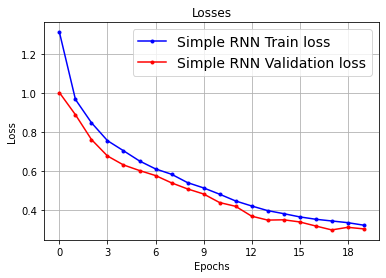

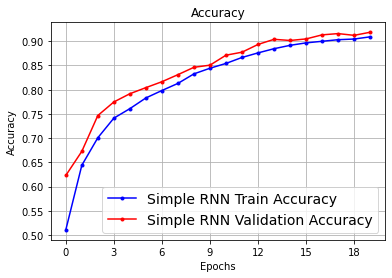

In [40]:
plot_learning_curves(RNN_history.history["loss"], RNN_history.history["val_loss"])
plt.show()
plot_learning_curves(RNN_history.history["accuracy"], RNN_history.history["val_accuracy"], y_label ="Accuracy", Title="Accuracy",
                         train_label = "Simple RNN Train Accuracy", val_label = "Simple RNN Validation Accuracy")

In [41]:
# Simple RNN Evaluation

rnn_evaluation = RNN_Model.evaluate(X_test, y_test)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (rnn_evaluation[0], rnn_evaluation[1]))

313/313 [==============================] - 4s 14ms/step - loss: 0.3228 - accuracy: 0.9100
Summary: Loss over the test dataset: 0.32, Accuracy: 0.91


Predicted result is: [7], target result is: 7


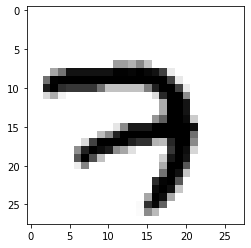

In [43]:
with tf.device("GPU:0"):
    
    RNN_Model.set_weights(RNN_Model.get_weights())
    result = tf.argmax(RNN_Model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
    print(
        "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
    )
    plt.imshow(sample, cmap="binary")

---

In [44]:
# Training LSTM on 20 epochs

start = time.time()
LSTM_Model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
LSTM_history = LSTM_Model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size = 128)
end = time.time()
print("Temps total d'execution = "+str(end-start) +" "+ "s")

Epoch 1/20
430/430 [==============================] - 9s 13ms/step - loss: 1.3060 - accuracy: 0.5734 - val_loss: 0.4540 - val_accuracy: 0.8746
Epoch 2/20
430/430 [==============================] - 5s 11ms/step - loss: 0.4393 - accuracy: 0.8756 - val_loss: 0.3254 - val_accuracy: 0.9066
Epoch 3/20
430/430 [==============================] - 5s 11ms/step - loss: 0.3411 - accuracy: 0.9035 - val_loss: 0.2645 - val_accuracy: 0.9236
Epoch 4/20
430/430 [==============================] - 4s 10ms/step - loss: 0.2858 - accuracy: 0.9176 - val_loss: 0.2362 - val_accuracy: 0.9328
Epoch 5/20
430/430 [==============================] - 5s 11ms/step - loss: 0.2489 - accuracy: 0.9299 - val_loss: 0.2090 - val_accuracy: 0.9430
Epoch 6/20
430/430 [==============================] - 5s 11ms/step - loss: 0.2219 - accuracy: 0.9370 - val_loss: 0.1886 - val_accuracy: 0.9466
Epoch 7/20
430/430 [==============================] - 5s 11ms/step - loss: 0.2042 - accuracy: 0.9418 - val_loss: 0.1767 - val_accuracy: 0.9494

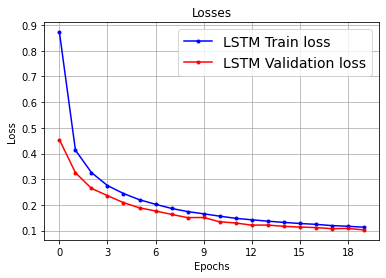

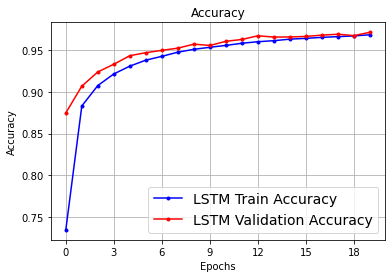

In [45]:
# Plotting Training loss vs Validation loss

plot_learning_curves(LSTM_history.history["loss"], LSTM_history.history["val_loss"], train_label = "LSTM Train loss", 
                     val_label = "LSTM Validation loss")
plt.show()
plot_learning_curves(LSTM_history.history["accuracy"], LSTM_history.history["val_accuracy"], y_label ="Accuracy", Title="Accuracy",
                         train_label = "LSTM Train Accuracy", val_label = "LSTM Validation Accuracy")

In [46]:
# LSTM Evaluation

lstm_evaluation = LSTM_Model.evaluate(X_test, y_test)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (lstm_evaluation[0], lstm_evaluation[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.1127 - accuracy: 0.9688
Summary: Loss over the test dataset: 0.11, Accuracy: 0.97


Predicted result is: [7], target result is: 7


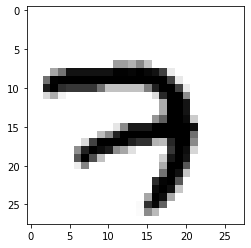

In [48]:
with tf.device("GPU:0"):
    
    LSTM_Model.set_weights(LSTM_Model.get_weights())
    result = tf.argmax(LSTM_Model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
    print(
        "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
    )
    plt.imshow(sample, cmap="binary")

---

In [49]:
# Training GRU on 20 epochs

start = time.time()
GRU_Model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
GRU_history = GRU_Model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), batch_size = 128)
end = time.time()
print("Temps total d'execution = "+str(end-start) +" "+ "s")

Epoch 1/20
430/430 [==============================] - 8s 11ms/step - loss: 1.4858 - accuracy: 0.4753 - val_loss: 0.7263 - val_accuracy: 0.7578
Epoch 2/20
430/430 [==============================] - 4s 9ms/step - loss: 0.6855 - accuracy: 0.7759 - val_loss: 0.4774 - val_accuracy: 0.8594
Epoch 3/20
430/430 [==============================] - 4s 10ms/step - loss: 0.4595 - accuracy: 0.8643 - val_loss: 0.3602 - val_accuracy: 0.8966
Epoch 4/20
430/430 [==============================] - 4s 9ms/step - loss: 0.3555 - accuracy: 0.8989 - val_loss: 0.2845 - val_accuracy: 0.9208
Epoch 5/20
430/430 [==============================] - 4s 9ms/step - loss: 0.2927 - accuracy: 0.9175 - val_loss: 0.2588 - val_accuracy: 0.9254
Epoch 6/20
430/430 [==============================] - 4s 9ms/step - loss: 0.2607 - accuracy: 0.9273 - val_loss: 0.2320 - val_accuracy: 0.9350
Epoch 7/20
430/430 [==============================] - 4s 9ms/step - loss: 0.2287 - accuracy: 0.9354 - val_loss: 0.2131 - val_accuracy: 0.9410
Epoc

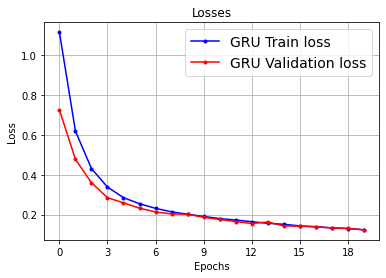

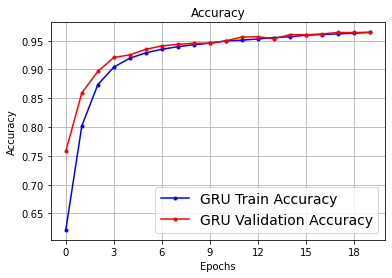

In [50]:
# Plotting Training loss vs Validation loss

plot_learning_curves(GRU_history.history["loss"], GRU_history.history["val_loss"], train_label = "GRU Train loss", 
                     val_label = "GRU Validation loss")
plt.show()
plot_learning_curves(GRU_history.history["accuracy"], GRU_history.history["val_accuracy"], y_label ="Accuracy", Title="Accuracy",
                         train_label = "GRU Train Accuracy", val_label = "GRU Validation Accuracy")

In [51]:
# GRU Evaluation

gru_evaluation = GRU_Model.evaluate(X_test, y_test)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (gru_evaluation[0], gru_evaluation[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.1230 - accuracy: 0.9649
Summary: Loss over the test dataset: 0.12, Accuracy: 0.96


Predicted result is: [7], target result is: 7


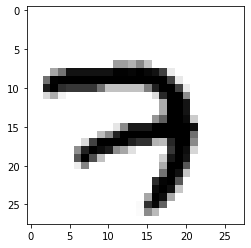

In [53]:
with tf.device("GPU:0"):
    
    GRU_Model.set_weights(GRU_Model.get_weights())
    result = tf.argmax(GRU_Model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
    print(
        "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
    )
    plt.imshow(sample, cmap="binary")

#### Recap: Pour la 3eme experience, le meilleur modele est celui de LSTM avec 97% d'accuracy. GRU avec 96% et Simple RNN enregistre toujours la pire des performances (91%).

# Implementing vision Transformer from scratch

In [54]:
# reshaping the data to (batch size, height, width, number of channel)

x_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
x_valid = X_valid.reshape((X_valid.shape[0], 28, 28, 1))
x_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [63]:
patch_size = 4  # Size of the patches to be extract from the input images
num_patches = (28 // patch_size) ** 2
projection_dim = 32
transformer_units = [projection_dim * 2, projection_dim, ]  # Size of the transformer layers
transformer_layers = 1
mlp_head_units = [100, 50]  # Size of the dense layers of the final classifier

In [64]:
def mlp(x, hidden_units):
    
    for units in hidden_units:
        x = keras.layers.Dense(units, activation="relu")(x)
        
    return x

In [65]:
class Patches(keras.layers.Layer):
    
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        
        return patches

In [66]:
class PatchEncoder(keras.layers.Layer):
    
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = keras.layers.Dense(units=projection_dim)
        self.position_embedding = keras.layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        
        return encoded

In [67]:
def transformer_block():
    
    inputs = keras.layers.Input(shape=(28, 28, 1))
    # Create patches.
    patches = Patches(patch_size)(inputs)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = keras.layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = keras.layers.MultiHeadAttention(
            num_heads=4, key_dim=projection_dim)(x1, x1)
        # Skip connection 1.
        x2 = keras.layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = keras.layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units)
        # Skip connection 2.
        encoded_patches = keras.layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = keras.layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = keras.layers.Flatten()(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units)
    # Classify outputs.
    outputs = keras.layers.Dense(10, activation="softmax")(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=outputs)
    
    return model

In [68]:
np.random.seed(37)
tf.random.set_seed(37)
Transf_Model = transformer_block()

In [69]:
Transf_Model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
patches_1 (Patches)             (None, None, 16)     0           input_2[0][0]                    
__________________________________________________________________________________________________
patch_encoder_1 (PatchEncoder)  (None, 49, 32)       2112        patches_1[0][0]                  
__________________________________________________________________________________________________
layer_normalization_3 (LayerNor (None, 49, 32)       64          patch_encoder_1[0][0]            
____________________________________________________________________________________________

In [70]:
start = time.time()
Transf_Model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=optimizer)
Transf_history = Transf_Model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), batch_size = 128)
end = time.time()
print("Temps total d'execution = "+str(end-start) +" "+ "s")

Epoch 1/10
430/430 [==============================] - 7s 13ms/step - loss: 0.7687 - accuracy: 0.7550 - val_loss: 0.1361 - val_accuracy: 0.9612
Epoch 2/10
430/430 [==============================] - 5s 12ms/step - loss: 0.1250 - accuracy: 0.9616 - val_loss: 0.0999 - val_accuracy: 0.9726
Epoch 3/10
430/430 [==============================] - 5s 12ms/step - loss: 0.0821 - accuracy: 0.9751 - val_loss: 0.0895 - val_accuracy: 0.9744
Epoch 4/10
430/430 [==============================] - 5s 12ms/step - loss: 0.0652 - accuracy: 0.9794 - val_loss: 0.0793 - val_accuracy: 0.9774
Epoch 5/10
430/430 [==============================] - 5s 12ms/step - loss: 0.0475 - accuracy: 0.9851 - val_loss: 0.0746 - val_accuracy: 0.9802
Epoch 6/10
430/430 [==============================] - 5s 12ms/step - loss: 0.0388 - accuracy: 0.9879 - val_loss: 0.0733 - val_accuracy: 0.9792
Epoch 7/10
430/430 [==============================] - 5s 12ms/step - loss: 0.0307 - accuracy: 0.9909 - val_loss: 0.0743 - val_accuracy: 0.9796

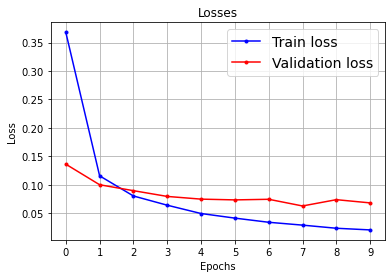

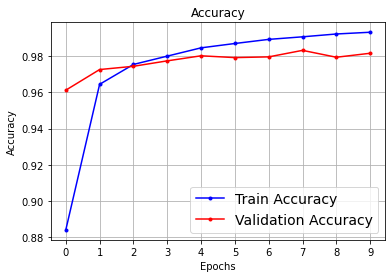

In [71]:
# Plotting Training loss vs Validation loss

plot_learning_curves(Transf_history.history["loss"], Transf_history.history["val_loss"], train_label = "Train loss", 
                     val_label = "Validation loss")
plt.show()
plot_learning_curves(Transf_history.history["accuracy"], Transf_history.history["val_accuracy"], y_label ="Accuracy", Title="Accuracy",
                         train_label = "Train Accuracy", val_label = "Validation Accuracy")

In [72]:
# Transformer Evaluation

transf_evaluation = Transf_Model.evaluate(x_test, y_test)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (transf_evaluation[0], transf_evaluation[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.0606 - accuracy: 0.9818
Summary: Loss over the test dataset: 0.06, Accuracy: 0.98


Predicted result is: [7], target result is: 7


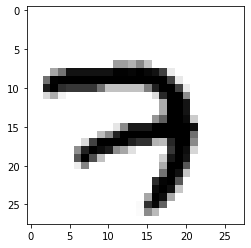

In [74]:
with tf.device("GPU:0"):
    
    Transf_Model.set_weights(Transf_Model.get_weights())
    result = tf.argmax(Transf_Model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
    print(
        "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
    )
    plt.imshow(sample, cmap="binary")

# Recap

In [75]:
pd.read_excel("Recap.xlsx")

,Model,Final validation accuracy,Test accuracy,Number of epochs,Time for training,Time for inference,Total number of parameters,Batch size,Optimizer,Learning rate
0,RNN Experience 1,0.7738,0.77,20,~456 s,2 s,500,128,Adam,0.001
1,LSTM Experience 1,0.9470,0.94,20,~86 s,1 s,1670,128,Adam,0.001
2,GRU Experience 1,0.9214,0.92,20,~82 s,2 s,1310,128,Adam,0.001
3,RNN Experience 2,0.9050,0.90,20,~442 s,3 s,1190,128,Adam,0.001
4,LSTM Experience 2,0.9742,0.97,20,82 s,2 s,4130,128,Adam,0.001
5,GRU Experience 2,0.9652,0.97,20,~79 s,2 s,3210,128,Adam,0.001
6,RNN Experience 3,0.9186,0.91,20,1784 s,4 s,920,128,Adam,0.001
7,LSTM Experience 3,0.9716,0.97,20,99 s,2 s,3350,128,Adam,0.001
8,GRU Experience 3,0.9644,0.96,20,~87 s,2 s,2630,128,Adam,0.001
9,Transformer,0.9816,0.98,10,55 s,2 s,185756,128,Adam,0.001


##### Comment:

- Au vu de ces differentes experiences, nous pouvons noter que le Simple RNN enregistre la mauvaise performance et le plus grand temps d'entrainement peu importe l'experience.
- Le modele avec Transformer enregistre la meilleure performance et ce avec a peine 10 epochs contrairement aux autres modeles. Aussi, nous faisons remarquer que nous n'avons pas eu besoin de faire plusieurs experiences avec Transformer, car avec a peine un block nous atteignons deja plus de 90% juste apres 2 epochs. Transformer enregistre le temps d'entrainement le plus court (55s) malgre ces 185 756 parametres, ce qui represente le nombre de parametre le plus eleve par rapport aux autres modeles.
- Enfin, le LSTM donne de tres bons resultats compare a GRU et ce peu importe l'experience

---